# financial_ratios.jsonl

### Importing Libraries and Reading Data

In [78]:
#!pip install plotly
import matplotlib.pyplot as plt
import pandas as pd
import json
import plotly.express as px
import seaborn as sns

In [3]:
filepath = "financial_ratios.jsonl"
df_json = pd.read_json(filepath, lines=True, dtype={'cust_num': str})
df_json

,cust_num,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow
0,10000,"5,150.00",738.64,$592.13,0.258,0.258402,0.115,0.841,"$142,213.10","$142,213.10","$26,886.90",1330.77,15969.24,0.286408,"159,913.10","3,819.23"
1,10001,"2,383.33",392.21,"1,013.86",0.590,0.589959,0.425,0.971,"$75,932.20","75,932.20","$2,267.80",1406.07,16872.84,3.986014,"189,932.20",$977.26
2,10002,"1,725.00",204.07,$317.81,0.303,0.302539,0.184,0.539,22314.6,"22,314.60","$19,085.40",521.88,6262.56,0.449275,31614.6,1203.12
3,10003,"2,616.67",$288.71,234.52,0.200,0.199961,0.090,0.147,"8,820.00",8820.0,"51,180.00",523.23,6278.76,0.277070,"$17,520.00",2093.4366666666665
4,10004,"2,050.00",$248.77,334.81,0.285,0.284673,0.163,0.488,24253.6,24253.6,"25,446.40",583.58,7002.96,0.292683,"$31,453.60",1466.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,99994,"6,025.00","2,120.97",519.87,0.438,0.438314,0.086,0.359,"48,680.40","48,680.40","$86,919.60","2,640.84",31690.08,0.156293,"$59,980.40","$3,384.16"
89995,99995,"$1,666.67",138.97,$545.44,0.411,0.410646,0.327,0.355,"15,833.00",15833.0,"$28,767.00",$684.41,8212.92,0.825000,32333.0,982.26
89996,99996,"1,666.67",$129.90,616.96,0.448,0.448116,0.370,0.669,"12,242.70",12242.7,"$6,057.30",$746.86,8962.32,0.890000,30042.7,919.8066666666667
89997,99997,"$1,666.67",162.11,$351.00,0.308,0.307866,0.211,0.562,"$30,516.60","30,516.60",23783.4,513.11,6157.32,0.585000,42216.6,"$1,153.56"


### Cleaning

In [4]:
print(df_json.info())
df_json.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cust_num                    89999 non-null  object 
 1   monthly_income              89999 non-null  object 
 2   existing_monthly_debt       89999 non-null  object 
 3   monthly_payment             89999 non-null  object 
 4   debt_to_income_ratio        89999 non-null  float64
 5   debt_service_ratio          89999 non-null  float64
 6   payment_to_income_ratio     89999 non-null  float64
 7   credit_utilization          89999 non-null  float64
 8   revolving_balance           88622 non-null  object 
 9   credit_usage_amount         89999 non-null  object 
 10  available_credit            89999 non-null  object 
 11  total_monthly_debt_payment  89999 non-null  object 
 12  annual_debt_payment         89999 non-null  float64
 13  loan_to_annual_income       899

,cust_num,monthly_income,existing_monthly_debt,monthly_payment,debt_to_income_ratio,debt_service_ratio,payment_to_income_ratio,credit_utilization,revolving_balance,credit_usage_amount,available_credit,total_monthly_debt_payment,annual_debt_payment,loan_to_annual_income,total_debt_amount,monthly_free_cash_flow
0,10000,"5,150.00",738.64,$592.13,0.258,0.258402,0.115,0.841,"$142,213.10","$142,213.10","$26,886.90",1330.77,15969.24,0.286408,"159,913.10","3,819.23"
1,10001,"2,383.33",392.21,"1,013.86",0.590,0.589959,0.425,0.971,"$75,932.20","75,932.20","$2,267.80",1406.07,16872.84,3.986014,"189,932.20",$977.26
2,10002,"1,725.00",204.07,$317.81,0.303,0.302539,0.184,0.539,22314.6,"22,314.60","$19,085.40",521.88,6262.56,0.449275,31614.6,1203.12
3,10003,"2,616.67",$288.71,234.52,0.200,0.199961,0.090,0.147,"8,820.00",8820.0,"51,180.00",523.23,6278.76,0.277070,"$17,520.00",2093.4366666666665
4,10004,"2,050.00",$248.77,334.81,0.285,0.284673,0.163,0.488,24253.6,24253.6,"25,446.40",583.58,7002.96,0.292683,"$31,453.60",1466.42


In [5]:
# Step 1: Identify numeric columns stored as object
num_cols = [
    "monthly_income",
    "existing_monthly_debt",
    "monthly_payment",
    "revolving_balance",
    "credit_usage_amount",
    "available_credit",
    "total_monthly_debt_payment",
    "total_debt_amount",
    "monthly_free_cash_flow"
]

# Step 2: Clean symbols (remove $, commas, spaces)
for col in num_cols:
    df_json[col] = (
        df_json[col]
        .astype(str)
        .str.replace("$", "", regex=False)
        .str.replace(",", "", regex=False)
        .str.replace(" ", "", regex=False)
    )

# Step 3: Convert to numeric
for col in num_cols:
    df_json[col] = pd.to_numeric(df_json[col], errors="coerce")

In [6]:
mask = df_json['revolving_balance'].notnull()

# Compare only rows where revolving_balance is not null
(df_json.loc[mask, 'revolving_balance'] == df_json.loc[mask, 'credit_usage_amount']).all()

np.True_

In [7]:
df_json['revolving_balance'] = df_json['revolving_balance'].fillna(
    df_json['credit_usage_amount']
)

In [8]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   cust_num                    89999 non-null  object 
 1   monthly_income              89999 non-null  float64
 2   existing_monthly_debt       89999 non-null  float64
 3   monthly_payment             89999 non-null  float64
 4   debt_to_income_ratio        89999 non-null  float64
 5   debt_service_ratio          89999 non-null  float64
 6   payment_to_income_ratio     89999 non-null  float64
 7   credit_utilization          89999 non-null  float64
 8   revolving_balance           89999 non-null  float64
 9   credit_usage_amount         89999 non-null  float64
 10  available_credit            89999 non-null  float64
 11  total_monthly_debt_payment  89999 non-null  float64
 12  annual_debt_payment         89999 non-null  float64
 13  loan_to_annual_income       899

# geographic_data.xml

### Importing Libraries and Reading Data

In [9]:
import pandas as pd
import numpy as np
import xml.etree.ElementTree as ET

In [11]:
path = "geographic_data.xml"
tree = ET.parse(path)
root = tree.getroot()

xml_rows = []
for child in root:
    row = {}
    for elem in child:
        row[elem.tag] = elem.text
    xml_rows.append(row)

df_xml = pd.DataFrame(xml_rows)
df_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          89999 non-null  object
 1   state                       89999 non-null  object
 2   regional_unemployment_rate  89999 non-null  object
 3   regional_median_income      89999 non-null  object
 4   regional_median_rent        89999 non-null  object
 5   housing_price_index         89999 non-null  object
 6   cost_of_living_index        89999 non-null  object
 7   previous_zip_code           89999 non-null  object
dtypes: object(8)
memory usage: 5.5+ MB


### Cleaning

In [12]:
#print(df_xml.info())
df_xml = df_xml.apply(lambda col: col.str.strip())
num_cols = ["regional_unemployment_rate", "regional_median_income", "regional_median_rent", "housing_price_index", "cost_of_living_index"]
for col in num_cols:
    df_xml[col] = (
        df_xml[col]
        .astype(str).str.strip()          
        .str.replace(",", "").str.replace("%", "") 
    )
    df_xml[col] = pd.to_numeric(df_xml[col], errors="coerce")
print(df_xml.info())
df_xml.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          89999 non-null  object 
 1   state                       89999 non-null  object 
 2   regional_unemployment_rate  89999 non-null  float64
 3   regional_median_income      89999 non-null  int64  
 4   regional_median_rent        89999 non-null  float64
 5   housing_price_index         89999 non-null  float64
 6   cost_of_living_index        89999 non-null  float64
 7   previous_zip_code           89999 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 5.5+ MB
None


,id,state,regional_unemployment_rate,regional_median_income,regional_median_rent,housing_price_index,cost_of_living_index,previous_zip_code
0,10000,OH,4.8,56000,1380.0,91.0,73.0,451
1,10001,PA,4.4,61000,1510.0,92.0,87.0,537
2,10002,VA,3.9,74000,1920.0,125.0,103.0,679
3,10003,CA,5.8,75000,1690.0,158.0,121.0,719
4,10004,WA,5.8,78000,1700.0,152.0,127.0,933


In [13]:
df_xml['state'].unique() #all good

array(['OH', 'PA', 'VA', 'CA', 'WA', 'MI', 'TX', 'MD', 'NY', 'MO', 'IL',
       'FL', 'NJ', 'WI', 'NC', 'AZ', 'TN', 'IN', 'GA', 'MA'], dtype=object)

In [14]:
df_xml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          89999 non-null  object 
 1   state                       89999 non-null  object 
 2   regional_unemployment_rate  89999 non-null  float64
 3   regional_median_income      89999 non-null  int64  
 4   regional_median_rent        89999 non-null  float64
 5   housing_price_index         89999 non-null  float64
 6   cost_of_living_index        89999 non-null  float64
 7   previous_zip_code           89999 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 5.5+ MB


# loan_details.xlsx

### Importing Libraries and Reading Data

In [15]:
excel_path = "loan_details.xlsx"
df_excel = pd.read_excel(excel_path, dtype={'customer_id': 'str', 'loan_officer_id': 'str'} )
print(df_excel.info())
df_excel.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          89999 non-null  object 
 1   loan_type            89999 non-null  object 
 2   loan_amount          89999 non-null  object 
 3   loan_term            89999 non-null  int64  
 4   interest_rate        89999 non-null  float64
 5   loan_purpose         89999 non-null  object 
 6   loan_to_value_ratio  89999 non-null  float64
 7   origination_channel  89999 non-null  object 
 8   loan_officer_id      89999 non-null  object 
 9   marketing_campaign   89999 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.9+ MB
None


,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,Personal,"$17,700",36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,mortgage,"$114,000",180,6.83,Refinance,0.774,Branch,1011,B


### Cleaning

In [16]:
print(df_excel['loan_type'].unique())
df_excel['loan_type'] = ( df_excel['loan_type'].str.strip().str.lower().str.replace('personal loan', 'personal')
                                                           .str.replace('creditcard', 'credit card')
                                                           .str.replace('cc', 'credit card'))
df_excel['loan_type'].unique()

['Personal' 'mortgage' 'Personal Loan' 'PERSONAL' 'CreditCard'
 'Credit Card' 'Mortgage' 'Home Loan' 'MORTGAGE' 'CC' 'credit card'
 'personal']


array(['personal', 'mortgage', 'credit card', 'home loan'], dtype=object)

In [17]:
df_excel['loan_amount'] = (
    df_excel['loan_amount']
    .str.strip()
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
    .str.replace(r'[$€£¥₹₽₩₺₴₦₱₫₲₵₡₮₢₨]', '', regex=True)
)
df_excel['loan_amount'] = pd.to_numeric(df_excel['loan_amount'], errors='coerce')
print(df_excel['loan_amount'].info())
df_excel.head(2)

<class 'pandas.core.series.Series'>
RangeIndex: 89999 entries, 0 to 89998
Series name: loan_amount
Non-Null Count  Dtype
--------------  -----
89999 non-null  int64
dtypes: int64(1)
memory usage: 703.2 KB
None


,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,personal,17700,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,mortgage,114000,180,6.83,Refinance,0.774,Branch,1011,B


In [17]:
a = df_excel['loan_term'].to_list()
a  # all good
b = df_excel['interest_rate'] < 0
b.unique() # all good
df_excel['loan_purpose'].unique() # all good
df_excel['loan_to_value_ratio'].info() # all good
df_excel['origination_channel'].unique() ## all good
df_excel['marketing_campaign'].unique() # all good

<class 'pandas.core.series.Series'>
RangeIndex: 89999 entries, 0 to 89998
Series name: loan_to_value_ratio
Non-Null Count  Dtype  
--------------  -----  
89999 non-null  float64
dtypes: float64(1)
memory usage: 703.2 KB


array(['W', 'B', 'K', 'A', 'S', 'Q', 'J', 'U', 'I', 'T', 'E', 'Z', 'O',
       'F', 'M', 'H', 'R', 'G', 'D', 'Y', 'V', 'X', 'C', 'P', 'N', 'L'],
      dtype=object)

In [19]:
print(df_excel.info())
df_excel.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          89999 non-null  object 
 1   loan_type            89999 non-null  object 
 2   loan_amount          89999 non-null  int64  
 3   loan_term            89999 non-null  int64  
 4   interest_rate        89999 non-null  float64
 5   loan_purpose         89999 non-null  object 
 6   loan_to_value_ratio  89999 non-null  float64
 7   origination_channel  89999 non-null  object 
 8   loan_officer_id      89999 non-null  object 
 9   marketing_campaign   89999 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 6.9+ MB
None


,customer_id,loan_type,loan_amount,loan_term,interest_rate,loan_purpose,loan_to_value_ratio,origination_channel,loan_officer_id,marketing_campaign
0,10000,personal,17700,36,12.50,Debt Consolidation,0.000,Direct Mail,1045,W
1,10001,mortgage,114000,180,6.83,Refinance,0.774,Branch,1011,B


# credit_history.parquet

### Importing Libraries and Reading Data

In [18]:
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
parquet_path = "credit_history.parquet"
df_parquet = pd.read_parquet(parquet_path)
df_parquet['customer_number'] = df_parquet['customer_number'].astype(str)
df_parquet.head()

,customer_number,credit_score,num_credit_accounts,oldest_credit_line_age,oldest_account_age_months,total_credit_limit,num_delinquencies_2yrs,num_inquiries_6mo,recent_inquiry_count,num_public_records,num_collections,account_diversity_index
0,10000,696,14,22.8,273.6,169100.0,0.0,2,2,1,0,0.499
1,10001,659,13,3.5,42.0,78200.0,0.0,6,6,0,0,0.298
2,10002,662,3,0.0,0.0,41400.0,0.0,2,2,0,0,0.174
3,10003,676,8,9.0,108.0,60000.0,0.0,1,1,0,0,0.263
4,10004,678,7,8.0,96.0,49700.0,0.0,1,1,0,0,0.298


In [19]:
df_parquet.info()
# 832(0.92%) null values in num_delinquencies_2yrs column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_number            89999 non-null  object 
 1   credit_score               89999 non-null  int64  
 2   num_credit_accounts        89999 non-null  int64  
 3   oldest_credit_line_age     89999 non-null  float64
 4   oldest_account_age_months  89999 non-null  float64
 5   total_credit_limit         89999 non-null  float64
 6   num_delinquencies_2yrs     89167 non-null  float64
 7   num_inquiries_6mo          89999 non-null  int64  
 8   recent_inquiry_count       89999 non-null  int64  
 9   num_public_records         89999 non-null  int64  
 10  num_collections            89999 non-null  int64  
 11  account_diversity_index    89999 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 8.2+ MB


### Cleaning

In [20]:
dup_count = df_parquet.duplicated(subset=['customer_number']).sum()
print(f'Total duplicate customer_number rows: {dup_count}')

Total duplicate customer_number rows: 0


In [21]:
df_parquet['num_delinquencies_2yrs'].describe()

count    89167.000000
mean         0.019323
std          0.138795
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: num_delinquencies_2yrs, dtype: float64

In [22]:
df_parquet.isnull().sum()

customer_number                0
credit_score                   0
num_credit_accounts            0
oldest_credit_line_age         0
oldest_account_age_months      0
total_credit_limit             0
num_delinquencies_2yrs       832
num_inquiries_6mo              0
recent_inquiry_count           0
num_public_records             0
num_collections                0
account_diversity_index        0
dtype: int64

In [23]:
value_counts = df_parquet['num_delinquencies_2yrs'].value_counts().sort_index()
print(value_counts)
# 0 - 97,17%
# 1 - 1,88%
# 2 - 0,01%
# null - 0,92%

num_delinquencies_2yrs
0.0    87458
1.0     1695
2.0       14
Name: count, dtype: int64


In [24]:
# Fill missing values with 0
df_parquet['num_delinquencies_2yrs'] = df_parquet['num_delinquencies_2yrs'].fillna(0)

In [25]:
df_parquet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_number            89999 non-null  object 
 1   credit_score               89999 non-null  int64  
 2   num_credit_accounts        89999 non-null  int64  
 3   oldest_credit_line_age     89999 non-null  float64
 4   oldest_account_age_months  89999 non-null  float64
 5   total_credit_limit         89999 non-null  float64
 6   num_delinquencies_2yrs     89999 non-null  float64
 7   num_inquiries_6mo          89999 non-null  int64  
 8   recent_inquiry_count       89999 non-null  int64  
 9   num_public_records         89999 non-null  int64  
 10  num_collections            89999 non-null  int64  
 11  account_diversity_index    89999 non-null  float64
dtypes: float64(5), int64(6), object(1)
memory usage: 8.2+ MB


# Metadata.csv

### Importing Libraries and Reading Data

In [26]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [28]:
csv_path = "application_metadata.csv"
df_metadata = pd.read_csv(csv_path, dtype= {'customer_ref': 'str','application_id': 'str'})
df_metadata.head()

,customer_ref,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,10000,620515,5,6,2013,Mail,REF0000,ACT-2,1.137099,13,2,1,1,0
1,10001,624978,4,2,2015,Phone,REF0000,ACT-3,-0.164932,6,1,1,1,1
2,10002,564658,10,3,2020,Phone,REF0000,ACT-3,0.526700,1,2,1,0,0
3,10003,621493,7,5,2010,Email,REF0000,A01,-0.709779,4,1,1,1,0
4,10004,637785,1,2,2020,Mail,REF0000,ACT-3,-0.603132,6,2,1,0,0


In [29]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_ref                89999 non-null  object 
 1   application_id              89999 non-null  object 
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-null  int64  
 13  default                     899

### Cleaning

In [30]:
df_metadata = df_metadata.rename(columns={'customer_ref':'id'})  

In [31]:
df_metadata["random_noise_1"] = df_metadata["random_noise_1"].round(3)
col = ['num_login_sessions', "num_customer_service_calls", "has_mobile_app", "paperless_billing", 'application_hour']
a = df_metadata[df_metadata[col] < 0]
a # all good

,id,application_id,application_hour,application_day_of_week,account_open_year,preferred_contact,referral_code,account_status_code,random_noise_1,num_login_sessions,num_customer_service_calls,has_mobile_app,paperless_billing,default
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_metadata['default'].isna().sum()

np.int64(0)

In [33]:
df_metadata['preferred_contact'].unique()

array(['Mail', 'Phone', 'Email'], dtype=object)

In [34]:
df_metadata['preferred_contact'] = df_metadata['preferred_contact'].str.replace("Mail", "Email")
df_metadata['preferred_contact'].unique()

array(['Email', 'Phone'], dtype=object)

In [35]:
df_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          89999 non-null  object 
 1   application_id              89999 non-null  object 
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-null  int64  
 13  default                     899

# Demographics.csv

### Importing Libraries and Reading Data

In [36]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [38]:
demo_path = "demographics.csv"
df_csv = pd.read_csv(demo_path, dtype={'cust_id': 'str'})
df_csv.head()

,cust_id,age,annual_income,employment_length,employment_type,education,marital_status,num_dependents
0,10000,41,$61800,2.2,Full-time,Graduate,Married,2
1,10001,38,"28,600",7.0,FULL_TIME,High School,Married,0
2,10002,18,"$20,700",0.8,FULL_TIME,Bachelor,Single,0
3,10003,27,"31,400",4.8,Full Time,Bachelor,Single,0
4,10004,26,$24600,5.2,Fulltime,High School,Single,0


In [39]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            89999 non-null  object 
 1   age                89999 non-null  int64  
 2   annual_income      89999 non-null  object 
 3   employment_length  87746 non-null  float64
 4   employment_type    89999 non-null  object 
 5   education          89999 non-null  object 
 6   marital_status     89999 non-null  object 
 7   num_dependents     89999 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 5.5+ MB


### Cleaning

In [40]:
df_csv.isnull().sum()

cust_id                 0
age                     0
annual_income           0
employment_length    2253
employment_type         0
education               0
marital_status          0
num_dependents          0
dtype: int64

In [41]:
df_csv["employment_type"] = df_csv["employment_type"].str.lower().replace({
    "full_time": "full-time",
    "full time": "full-time",
    "fulltime": "full-time",
    "ft": "full-time",
    
    "part time": "part-time",
    "part_time": "part-time",
    "part-time": "part-time",
    "pt": "part-time",
    
    "self_employed": "self-employed",
    "self emp": "self-employed",
    "self employed": "self-employed",
    "contractor": "contract"
})

In [42]:
df_csv['employment_length'].describe()

count    87746.000000
mean         5.514893
std          3.268233
min          0.000000
25%          3.000000
50%          5.200000
75%          7.700000
max         23.900000
Name: employment_length, dtype: float64

In [43]:
df_csv['employment_length'] = df_csv['employment_length'].fillna(0)

In [44]:
df_csv["annual_income"] = (df_csv["annual_income"].str.replace("$", "", regex=False) .str.replace(",", "", regex=False).astype(float))

In [45]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cust_id            89999 non-null  object 
 1   age                89999 non-null  int64  
 2   annual_income      89999 non-null  float64
 3   employment_length  89999 non-null  float64
 4   employment_type    89999 non-null  object 
 5   education          89999 non-null  object 
 6   marital_status     89999 non-null  object 
 7   num_dependents     89999 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.5+ MB


# Final Dataset

In [46]:
# Start with metadata as the base
df_final = df_metadata.copy()

# 1. Merge financial_ratios (df_json)
df_final = df_final.merge(
    df_json,
    left_on="id",
    right_on="cust_num",
    how="left"
).drop(columns=["cust_num"])

# 2. Merge geographic_data (df_xml)
df_final = df_final.merge(
    df_xml,
    left_on="id",
    right_on="id",
    how="left"
)

# 3. Merge loan_details (df_excel)
df_final = df_final.merge(
    df_excel,
    left_on="id",
    right_on="customer_id",
    how="left"
).drop(columns=["customer_id"])

# 4. Merge credit_history (df_parquet)
df_final = df_final.merge(
    df_parquet,
    left_on="id",
    right_on="customer_number",
    how="left"
).drop(columns=["customer_number"])

# 5. Merge demographics (df_csv)
df_final = df_final.merge(
    df_csv,
    left_on="id",
    right_on="cust_id",
    how="left"
).drop(columns=["cust_id"])


In [47]:
cols_to_drop = [
    "existing_monthly_debt",
    "monthly_free_cash_flow",
    "state",
    "regional_unemployment_rate",
    "regional_median_income",
    "regional_median_rent",
    "cost_of_living_index",
    "previous_zip_code",
    "origination_channel",
    "loan_officer_id",
    "marketing_campaign",
    "num_dependents"
]

df_final = df_final.drop(columns=cols_to_drop, errors="ignore")


In [48]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89999 entries, 0 to 89998
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          89999 non-null  object 
 1   application_id              89999 non-null  object 
 2   application_hour            89999 non-null  int64  
 3   application_day_of_week     89999 non-null  int64  
 4   account_open_year           89999 non-null  int64  
 5   preferred_contact           89999 non-null  object 
 6   referral_code               89999 non-null  object 
 7   account_status_code         89999 non-null  object 
 8   random_noise_1              89999 non-null  float64
 9   num_login_sessions          89999 non-null  int64  
 10  num_customer_service_calls  89999 non-null  int64  
 11  has_mobile_app              89999 non-null  int64  
 12  paperless_billing           89999 non-null  int64  
 13  default                     899

In [50]:
df_final.to_csv('final_dataset.csv', index=False)

# Visuals

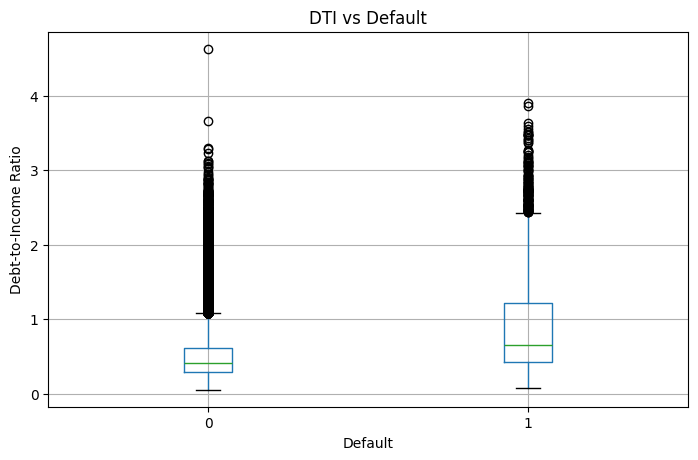

In [73]:
def plot_dti_vs_default(df):
    df.boxplot(column="debt_to_income_ratio", by="default", figsize=(8,5))
    plt.title("DTI vs Default")
    plt.suptitle("")
    plt.xlabel("Default")
    plt.ylabel("Debt-to-Income Ratio")
    plt.show()


plot_dti_vs_default(df_final)

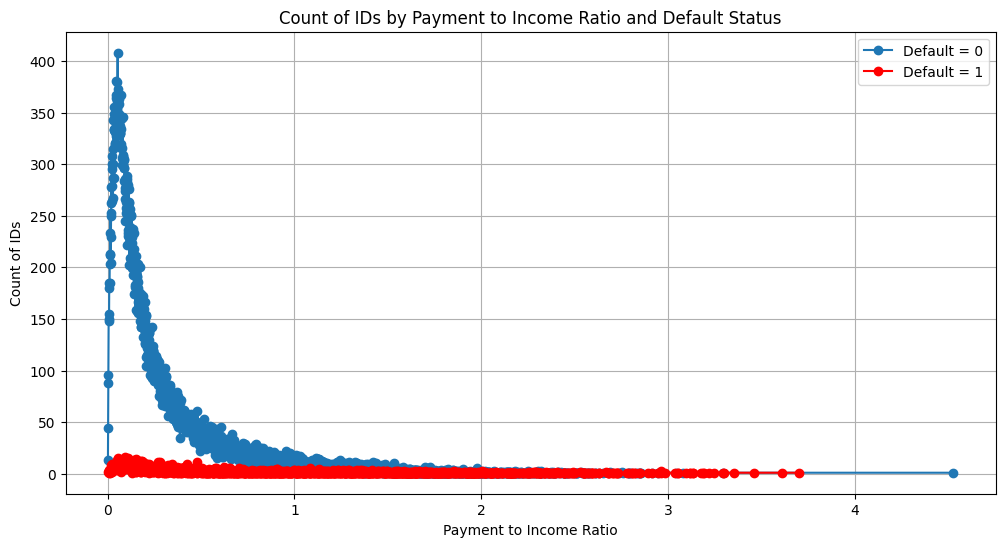

In [84]:
counts = df_final.groupby(['payment_to_income_ratio', 'default'])['id'].count().reset_index(name='count')

# Separate data for default 0 and 1
default_0 = counts[counts['default'] == 0]
default_1 = counts[counts['default'] == 1]

# Plotting
plt.figure(figsize=(12,6))
plt.plot(default_0['payment_to_income_ratio'], default_0['count'], label='Default = 0', marker='o')
plt.plot(default_1['payment_to_income_ratio'], default_1['count'], label='Default = 1', marker='o', color='red')

plt.xlabel('Payment to Income Ratio')
plt.ylabel('Count of IDs')
plt.title('Count of IDs by Payment to Income Ratio and Default Status')
plt.legend()
plt.grid(True)
plt.show()
